In [1]:
## Importing Libraries

#basic operation
import numpy as np

#for dataframe manipulations
import pandas as pd

#for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#for missing values 
import missingno as mno


# for date time manipulation
import datetime

#for interractivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

#setting up the brackground style for the plots
plt.style.use("fivethirtyeight")

In [2]:
# lets read the dataset
data = pd.read_csv("data-1.csv")


In [4]:
# Reading data also check the computation time
%time data = pd.read_csv("data-1.csv")

# lets check the shape of these datasets
print("Shape of Dataset :", data.shape)

CPU times: total: 172 ms
Wall time: 290 ms
Shape of Dataset : (18207, 89)


In [5]:
# Lets check the column names present in the data
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
# Checking the frist 5 rows and columns
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
# Checking the frist 5 rows and columns
pd.set_option("display.max_columns", 100)
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [9]:
# lest describe the data for numericals columns
data.iloc[:,2:].describe().style.background_gradient(cmap="cividis")

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [12]:
# lets check the descriptive statistics for the categorical columns as well
data.iloc[:,13:].describe(include = 'object')

,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,2,9,10,2,27,1736,341,36,21,57,93,93,93,105,102,102,102,105,101,101,101,100,92,92,92,100,95,99,99,99,95,98,108,108,108,98,1244
top,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,705,705,705,745,713,713,713,745,744,744,744,804,762,762,762,804,713,660,660,660,713,669,634,634,634,669,557


# Clenning the data 

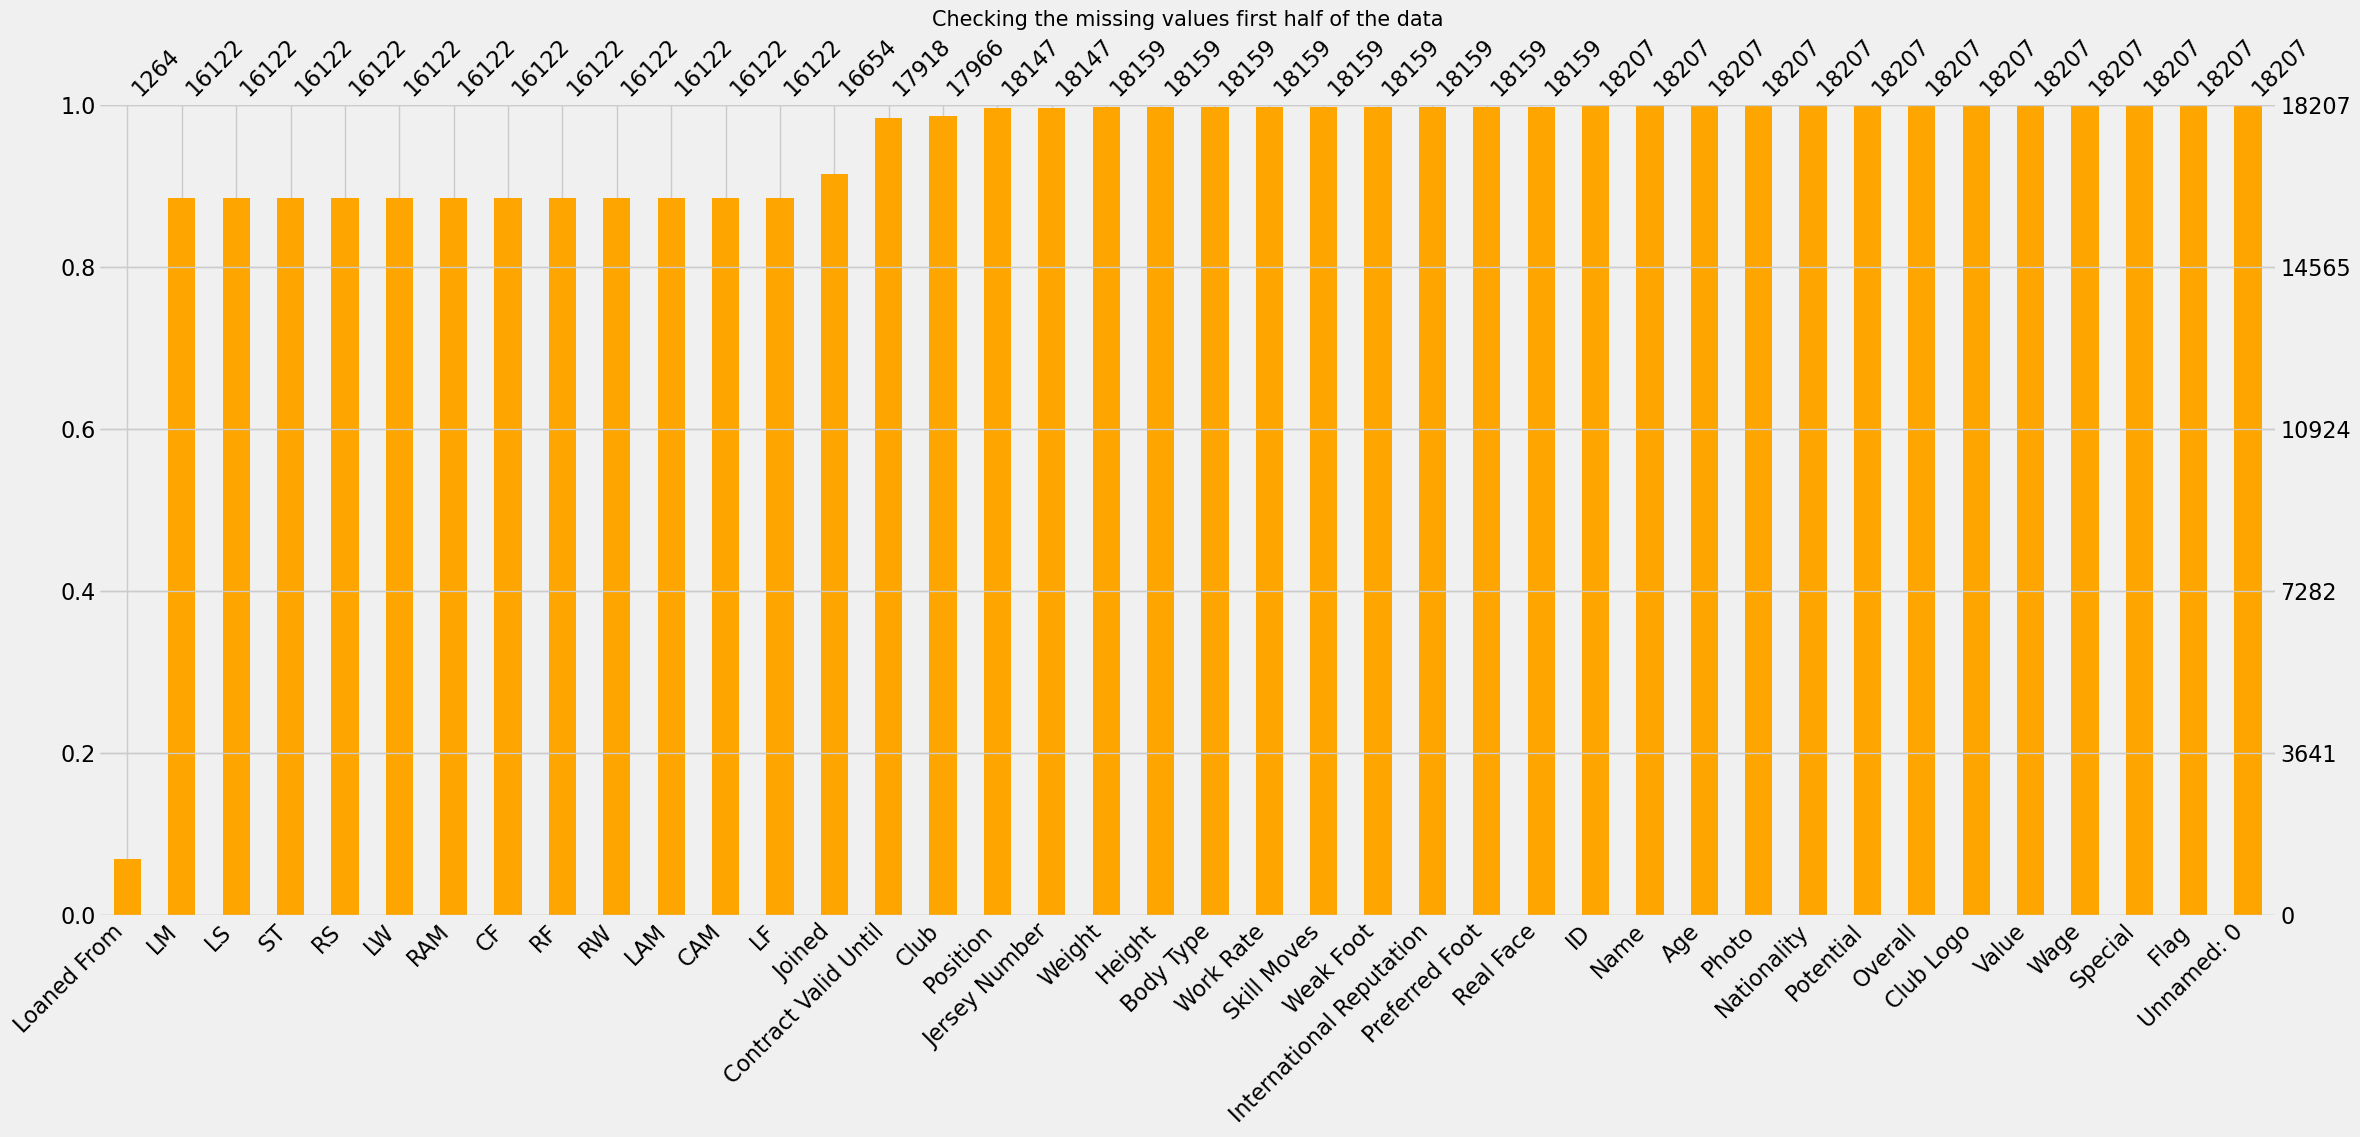

In [13]:
# Checking if the data contains any NULL values
# Visualize missing values as a matrix
mno.bar(data.iloc[:, :40],color='orange',sort='ascending')
plt.title("Checking the missing values first half of the data", fontsize = 15)
plt.show()

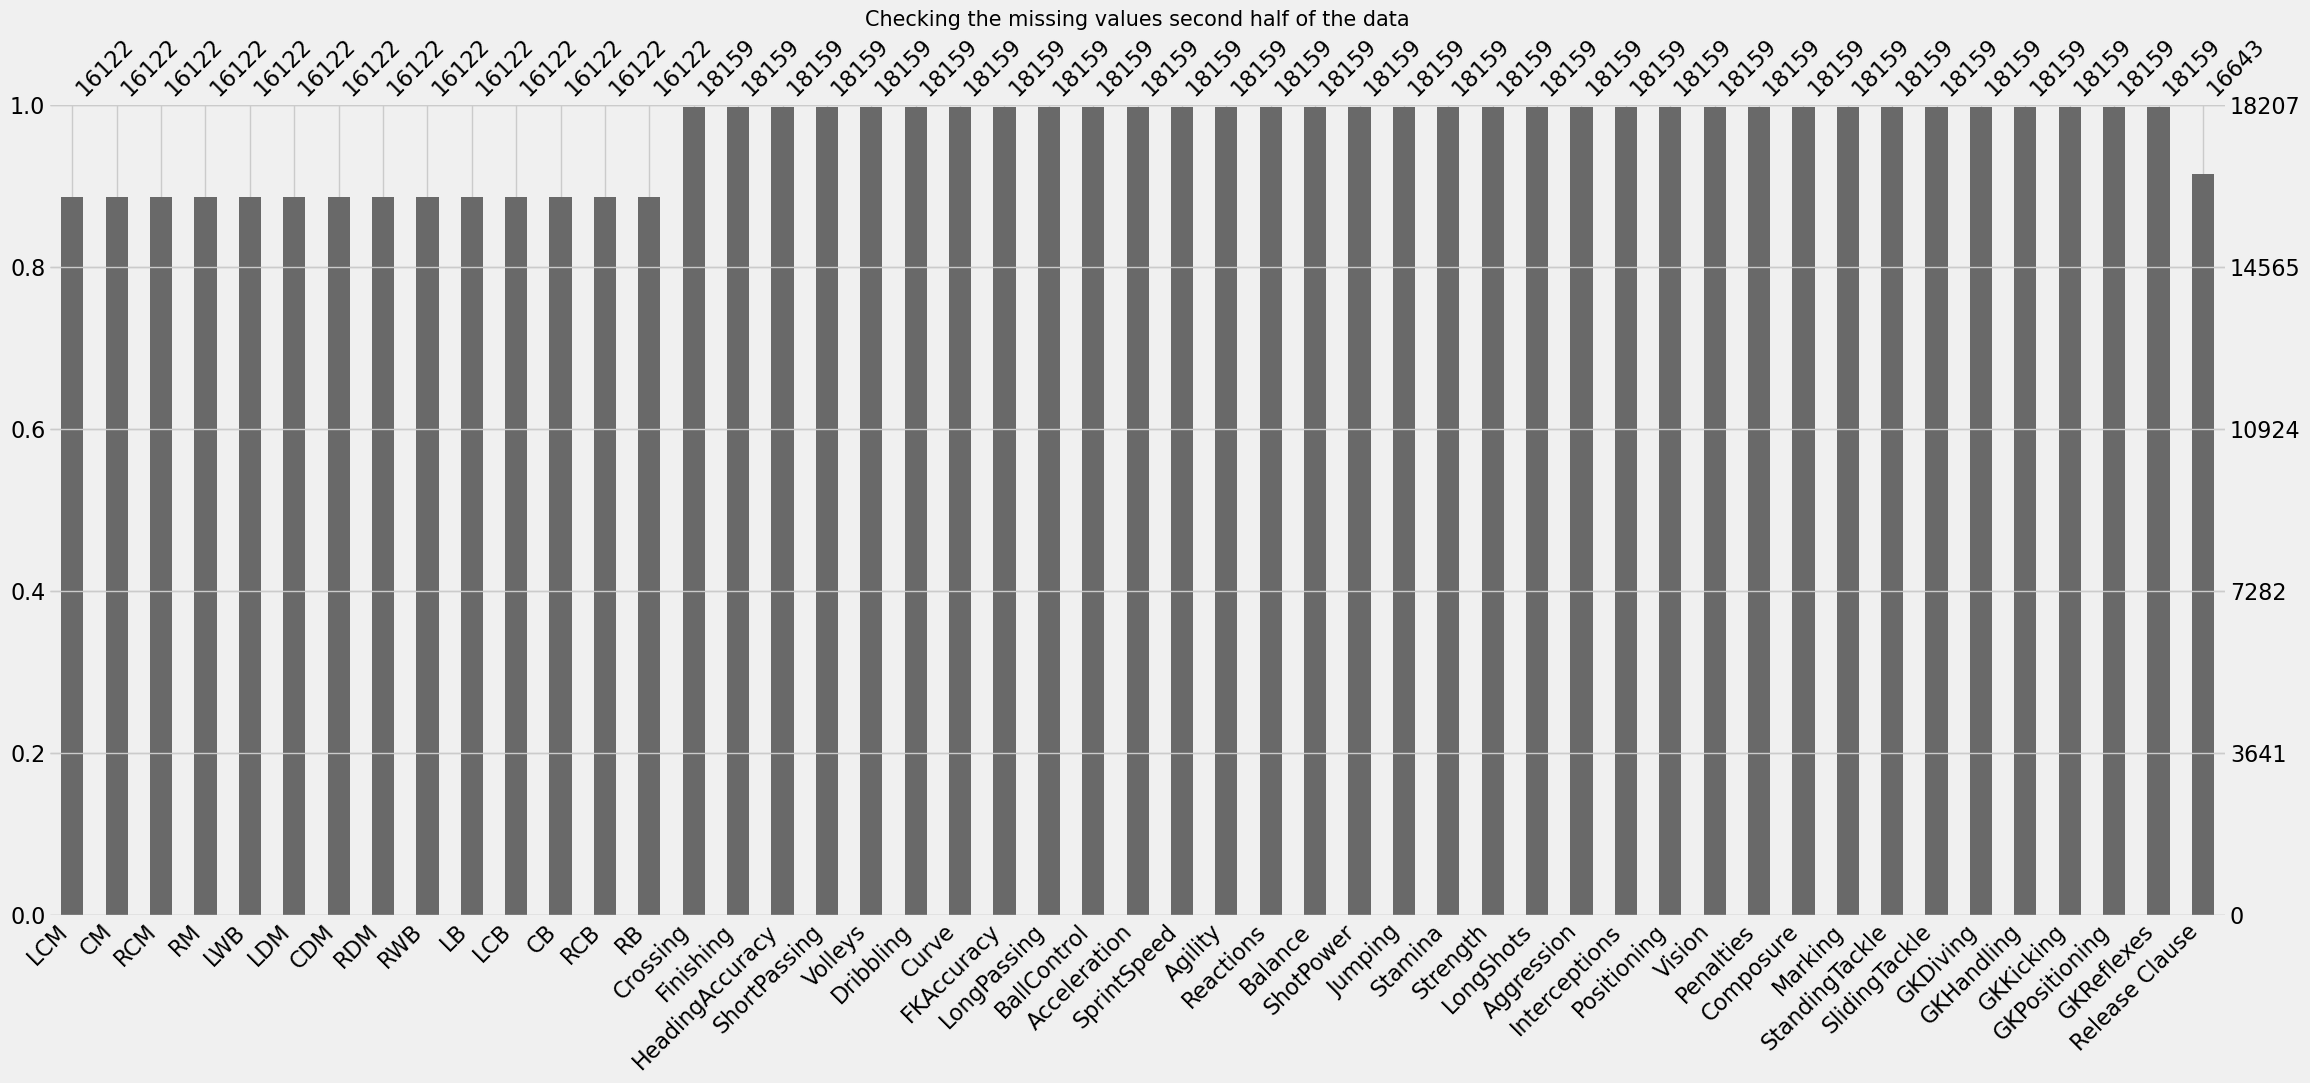

In [14]:
# Checking if the data contains any NULL values 2nd half
# Visualize missing values as a matrix
mno.bar(data.iloc[:, 40:])
plt.title("Checking the missing values second half of the data", fontsize = 15)
plt.show()

In [15]:
## Missing values inputation

# filling the missing values for the continous variables for proper data visualization
data['ShortPassing'].fillna(data["ShortPassing"].mean(), inplace=True)
data['Volleys'].fillna(data["Volleys"].mean(), inplace=True)
data['Dribbling'].fillna(data["Dribbling"].mean(), inplace=True)
data['Curve'].fillna(data["Curve"].mean(), inplace=True)
data['FKAccuracy'].fillna(data["FKAccuracy"].mean(), inplace=True)
data['LongPassing'].fillna(data["LongPassing"].mean(), inplace=True)
data['BallControl'].fillna(data["BallControl"].mean(), inplace=True)
data['HeadingAccuracy'].fillna(data["HeadingAccuracy"].mean(), inplace=True)
data['Finishing'].fillna(data["Finishing"].mean(), inplace=True)
data['Crossing'].fillna(data["Crossing"].mean(), inplace=True)
data['Weight'].fillna("200lbs", inplace=True)
data['Contract Valid Until'].fillna(2019, inplace=True)
data['Height'].fillna("5'11", inplace=True)
data['Loaned From'].fillna("None", inplace=True)
data['Joined'].fillna("Jul 1, 2018", inplace=True)
data['Jersey Number'].fillna(8, inplace=True)
data['Body Type'].fillna('Normal', inplace=True)
data['Position'].fillna("ST", inplace=True)
data['Club'].fillna('Club', inplace=True)
data['Work Rate'].fillna('Medium/ Medium', inplace=True)
data['Skill Moves'].fillna(data["Skill Moves"].median(), inplace=True)
data['Weak Foot'].fillna(3, inplace=True)
data['Preferred Foot'].fillna("Right", inplace=True)
data['International Reputation'].fillna(1, inplace=True)
data['Wage'].fillna('$200K', inplace=True)
data.fillna(0, inplace=True)

In [16]:
# lets check for data is still having Null values or not
data.isnull().sum().sum()

0

# Feature Engineering

In [18]:
# Creating new features by aggregating the feature
def defending(data):
    return int(round((data[['Marking',"StandingTackle",'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy',"Dribbling",'Curve', "BallControl"]].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression',"Interceptions",'Positioning', "Vision","Composure"]].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing',"ShortPassing",'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration',"SprintSpeed",'Agility',"Reactions"]].mean()).mean()))


def power(data):
    return int(round((data[['Balance',"Jumping",'Stamina',"Strength"]].mean()).mean()))


def rating(data):
    return int(round((data[['Potential',"Overall"]].mean()).mean()))


def shooting(data):
    return int(round((data[['Finishing',"Volleys",'FKAccuracy',"ShotPower","LongShots","Penalties"]].mean()).mean()))

In [19]:
# Adding these categories to the data

data['Defending'] = data.apply(defending, axis=1)
data['General'] = data.apply(general, axis=1)
data['Mental'] = data.apply(mental, axis=1)
data['Passing'] = data.apply(passing, axis=1)
data['Mobility'] = data.apply(mobility, axis=1)
data['Power'] = data.apply(power, axis=1)
data['Rating'] = data.apply(rating, axis=1)
data['Shooting'] = data.apply(shooting, axis=1)

In [20]:
# Check the colums
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [21]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",None,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,29,89,71,87,91,74,94,88
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",None,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,27,88,73,81,91,83,94,88
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",None,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,28,85,72,80,94,69,92,84
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",None,2020,6'4,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,16,26,43,39,66,54,92,21
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",None,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,59,79,81,92,81,76,92,85


# Data Visualization

C:\Users\prana\AppData\Local\Temp\ipykernel_39536\1777957350.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Defending'], color='red')
C:\Users\prana\AppData\Local\Temp\ipykernel_39536\1777957350.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['General'], color='black')
C:\Use

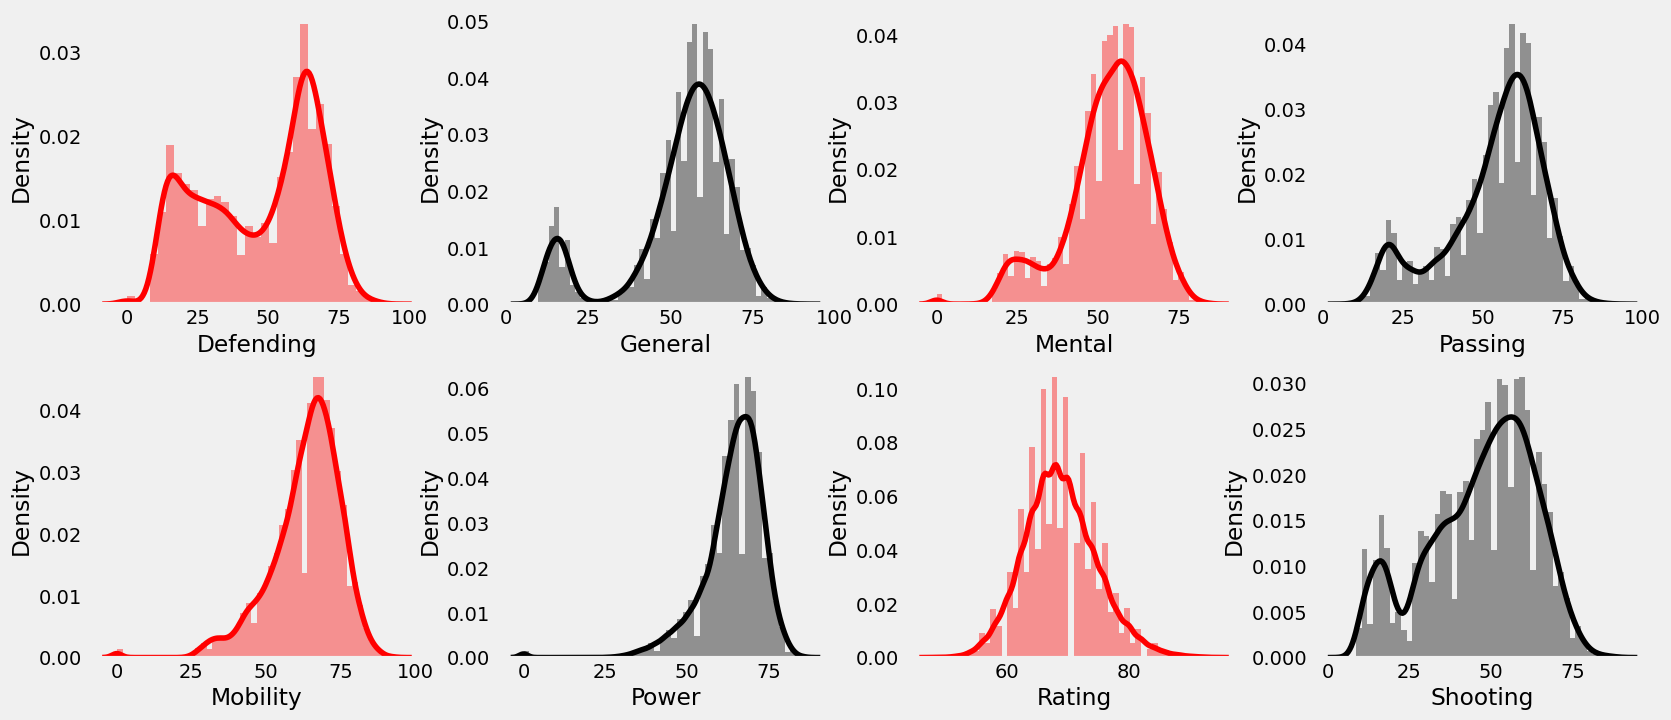

In [22]:
# lets check the distribution of scores of Different skills
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2,4,1)
sns.distplot(data['Defending'], color='red')
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['General'], color='black')
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['Mental'], color='red')
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['Passing'], color='black')
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['Mobility'], color='red')
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['Power'], color='black')
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['Rating'], color='red')
plt.grid()

plt.subplot(2,4,8)
sns.distplot(data['Shooting'], color='black')
plt.grid()


C:\Users\prana\AppData\Local\Temp\ipykernel_39536\420551431.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Preferred Foot'], palette="pink")


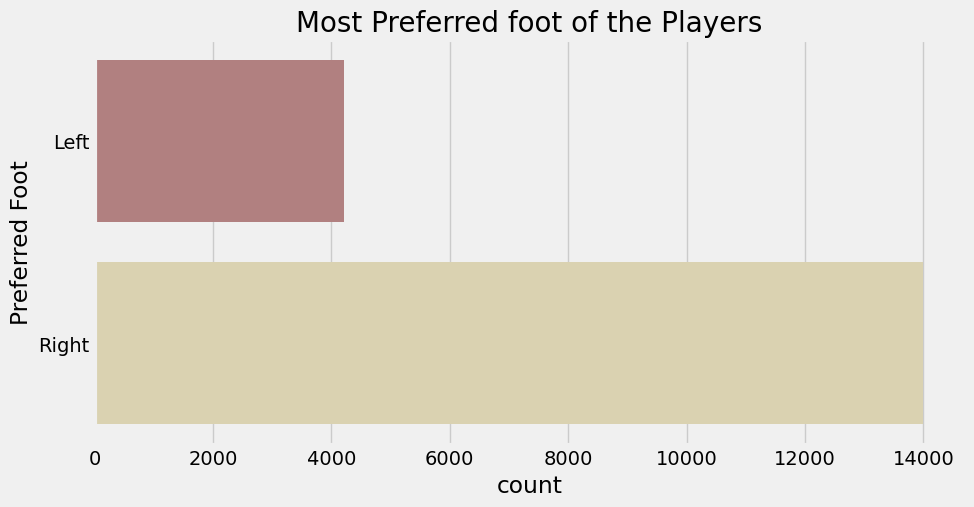

In [24]:
#Comparison of preffered foot over the different players
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(data['Preferred Foot'], palette="pink")
plt.title("Most Preferred foot of the Players", fontsize=20)
plt.show()

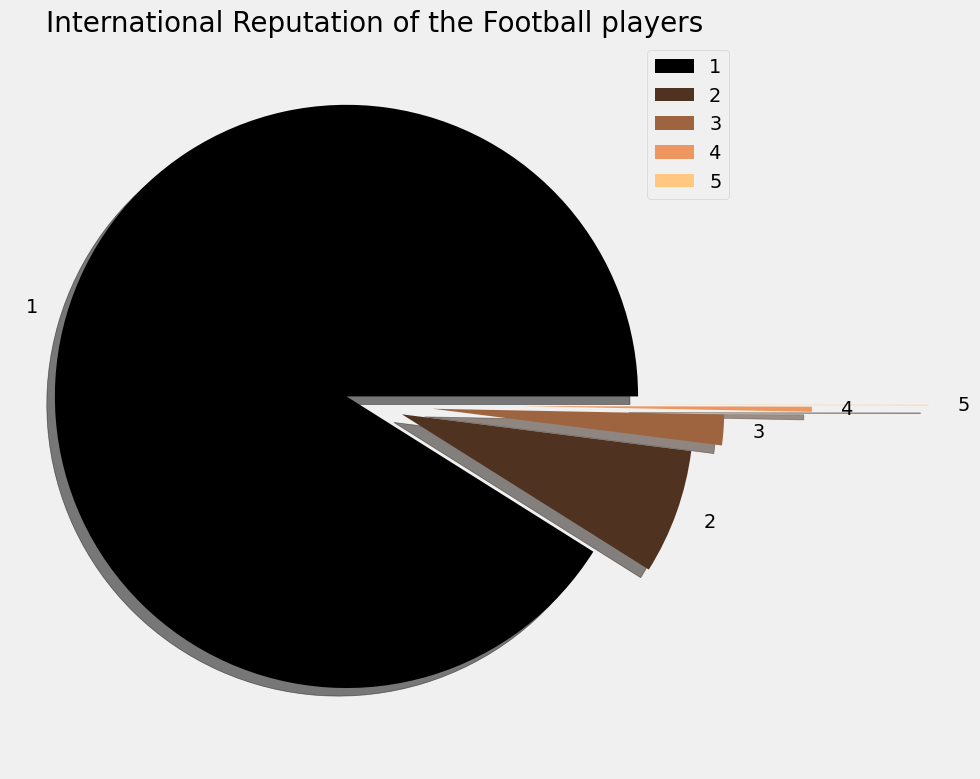

In [25]:
# Plotting a pie chart to represent share of international reputation

labels = ['1','2','3','4','5']
sizes = data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0,1,5))
explode = [0.1,0.1,0.2,0.5,0.9]

plt.rcParams['figure.figsize']=(9,9)
plt.pie(sizes, labels=labels, colors=colors, explode=explode, shadow=True)
plt.title("International Reputation of the Football players", fontsize=20)
plt.legend()
plt.show()

In [27]:
data[data['International Reputation']==5][["Name", "Nationality","Overall"]].sort_values(by='Overall', ascending = False).style.background_gradient(cmap='magma')

,Name,Nationality,Overall
0,L. Messi,Argentina,94
1,Cristiano Ronaldo,Portugal,94
2,Neymar Jr,Brazil,92
7,L. Suárez,Uruguay,91
22,M. Neuer,Germany,89
109,Z. Ibrahimović,Sweden,85


In [28]:
data[data['International Reputation']==5][["Name", "Nationality","Overall"]].sort_values(by='Overall', ascending=False)

,Name,Nationality,Overall
0,L. Messi,Argentina,94
1,Cristiano Ronaldo,Portugal,94
2,Neymar Jr,Brazil,92
7,L. Suárez,Uruguay,91
22,M. Neuer,Germany,89
109,Z. Ibrahimović,Sweden,85


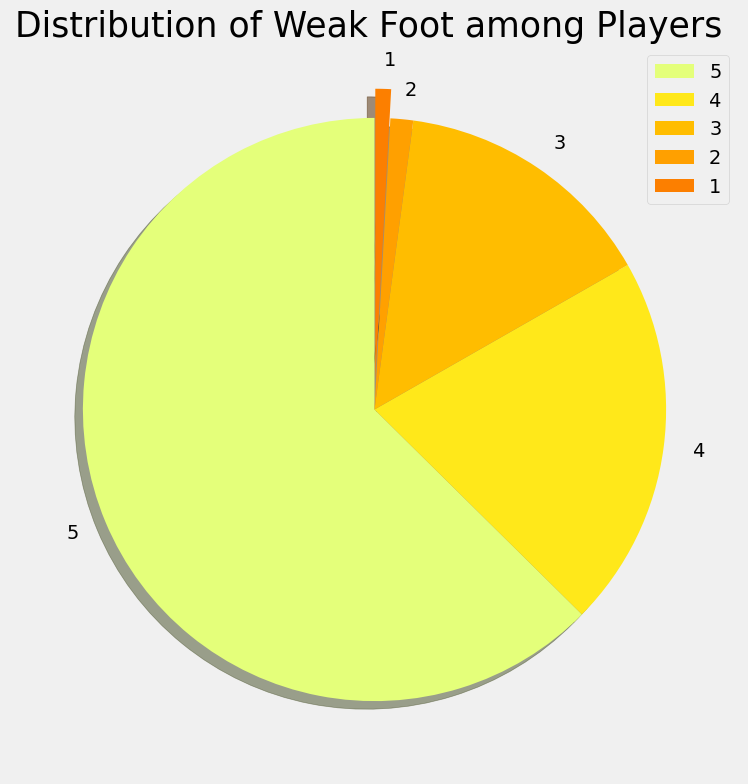

In [29]:
# Plotting a pie chart to represent share of weak foot players 

labels = ['5', '4', '3', '2', '1']
sizes = data['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,5))
explode = [0,0,0,0,0.1]

plt.pie(sizes, labels=labels, colors=colors, explode=explode, shadow=True, startangle=90)
plt.title("Distribution of Weak Foot among Players ", fontsize=25)
plt.legend()
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_39536\3348888401.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Position',data=data, palette='bone')


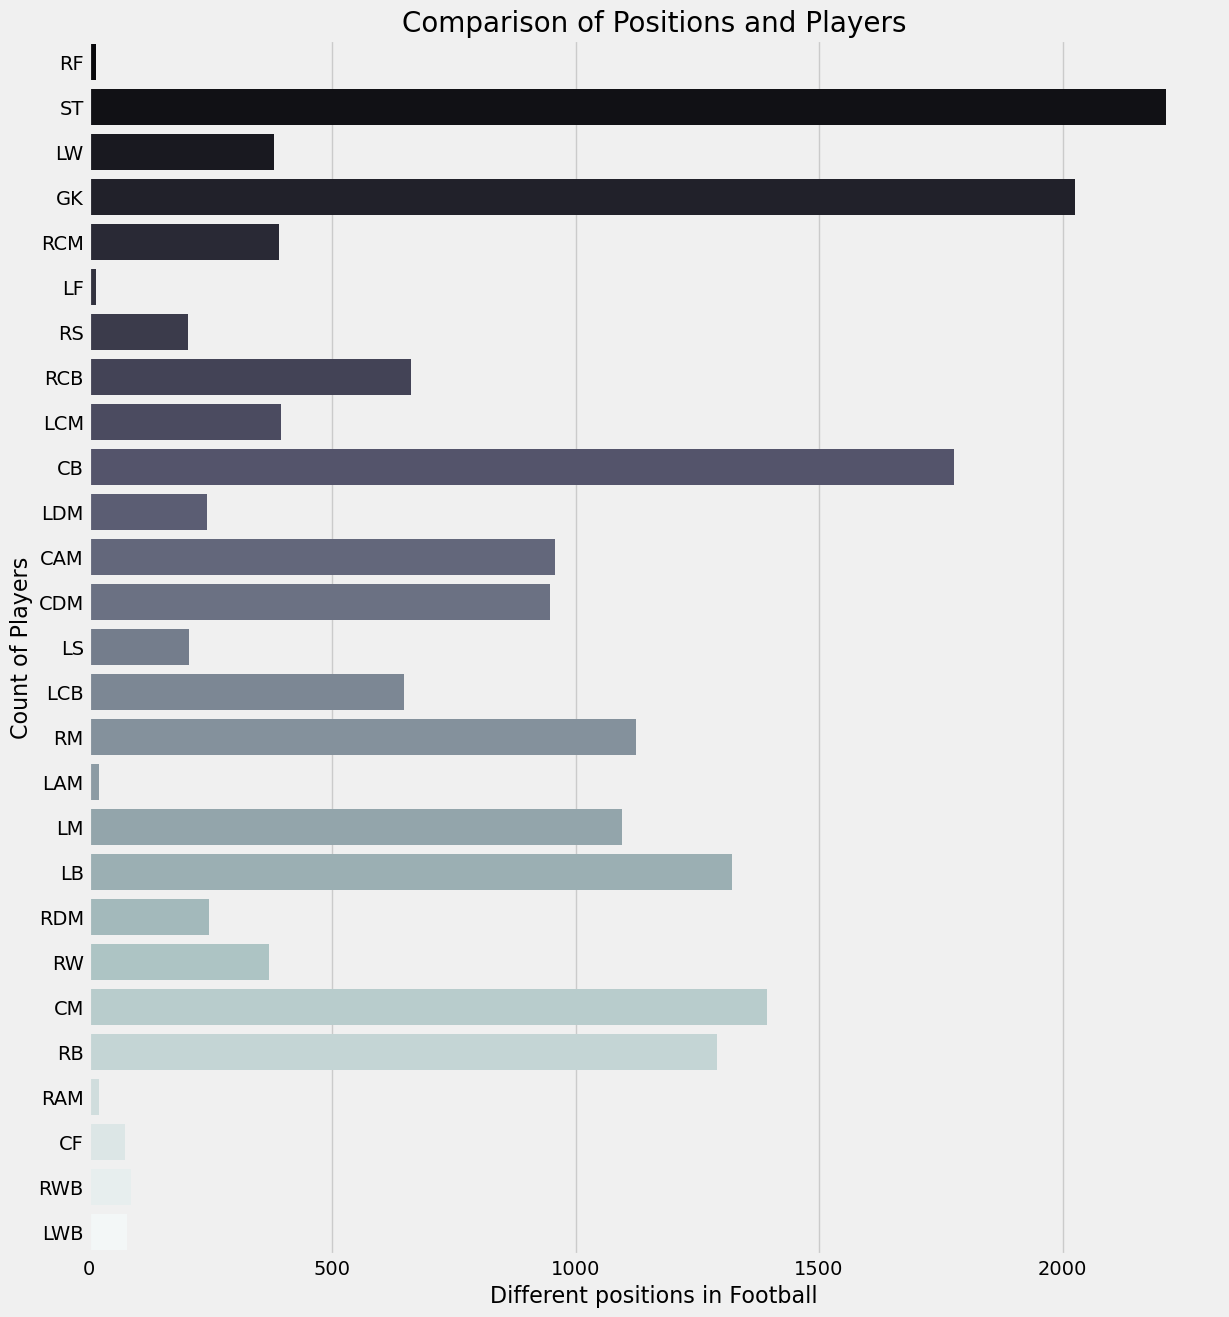

In [30]:
# Diffrerent position acquired by the players
plt.figure(figsize= (13,15))
plt.style.use('fivethirtyeight')
ax = sns.countplot(y='Position',data=data, palette='bone')
ax.set_xlabel(xlabel = 'Different positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label='Comparison of Positions and Players', fontsize=20)
plt.show()

In [31]:
# Defining a function for cleaning the weight data
def exract_value_from(value):
    out = value.replace("lbs","")
    return float(out)

In [32]:
#applying the function to weight column
data['Weight'] = data['Weight'].apply(lambda x : exract_value_from(x))

C:\Users\prana\AppData\Local\Temp\ipykernel_39536\1720594694.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'], color = 'black')


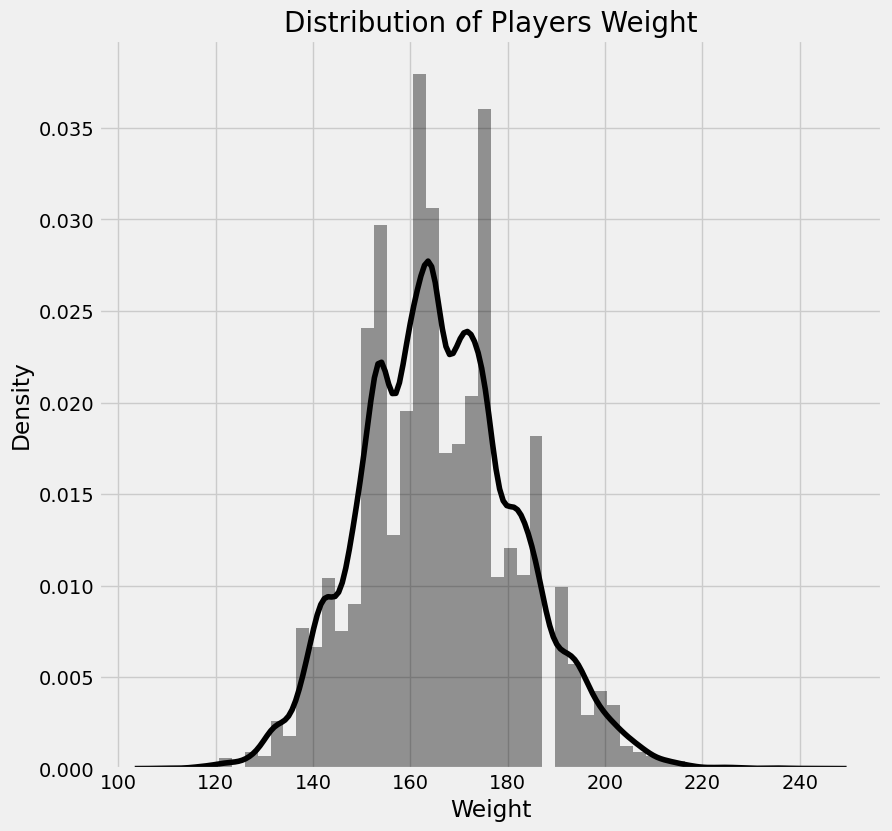

In [33]:
#plotting the distribution of weight of the players
sns.distplot(data['Weight'], color = 'black')
plt.title("Distribution of Players Weight", fontsize = 20)
plt.show()

In [48]:
# Defining a function for cleaning the wage column
def extract_value_from(column):
    out = column.replace('€',"")
    if "M" in out:
        out = float(out.replace('M',''))*1000000
    elif "K" in column:
        out = float(out.replace('K',''))*1000
    return float(out)

C:\Users\prana\AppData\Local\Temp\ipykernel_39536\1995576561.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Value'], color='red')
C:\Users\prana\AppData\Local\Temp\ipykernel_39536\1995576561.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Wage'], color='black')


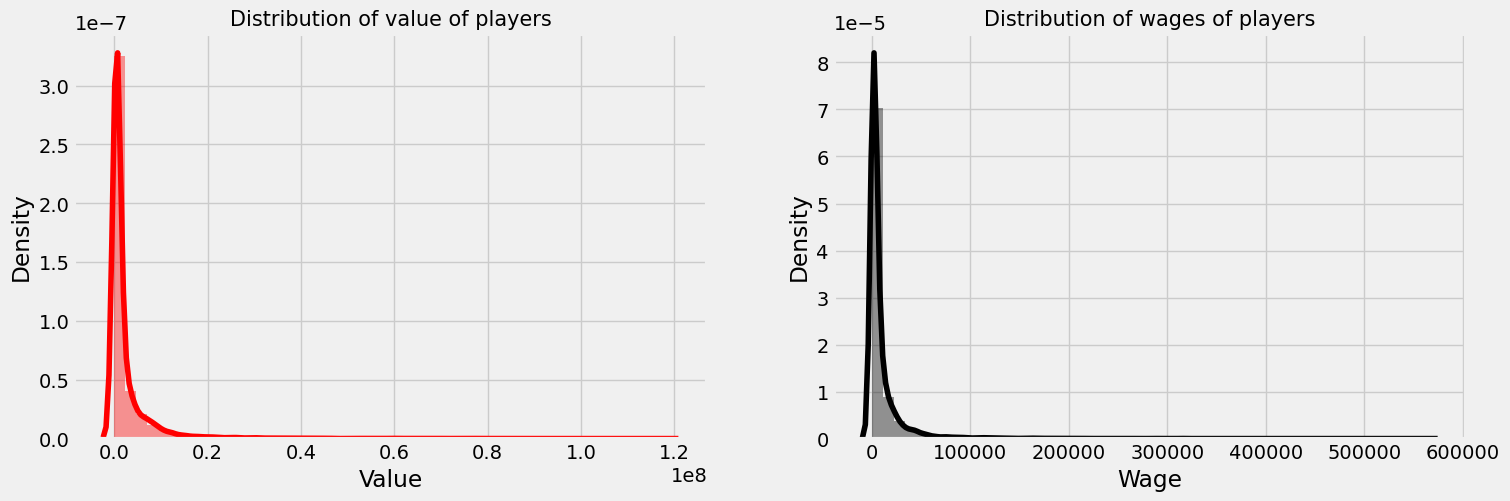

In [49]:
# applying the function to the wage and value column

data['Value'] = data['Value'].apply(lambda x : extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x : extract_value_from(x))

# visualize the data
plt.rcParams['figure.figsize']=(16,5)

plt.subplot(1,2,1)
sns.distplot(data['Value'], color='red')
plt.title("Distribution of value of players", fontsize = 15)

plt.subplot(1,2,2)
sns.distplot(data['Wage'], color='black')
plt.title("Distribution of wages of players", fontsize = 15)
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_39536\1191901158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x= 'Skill Moves', data = data, palette= "pastel")


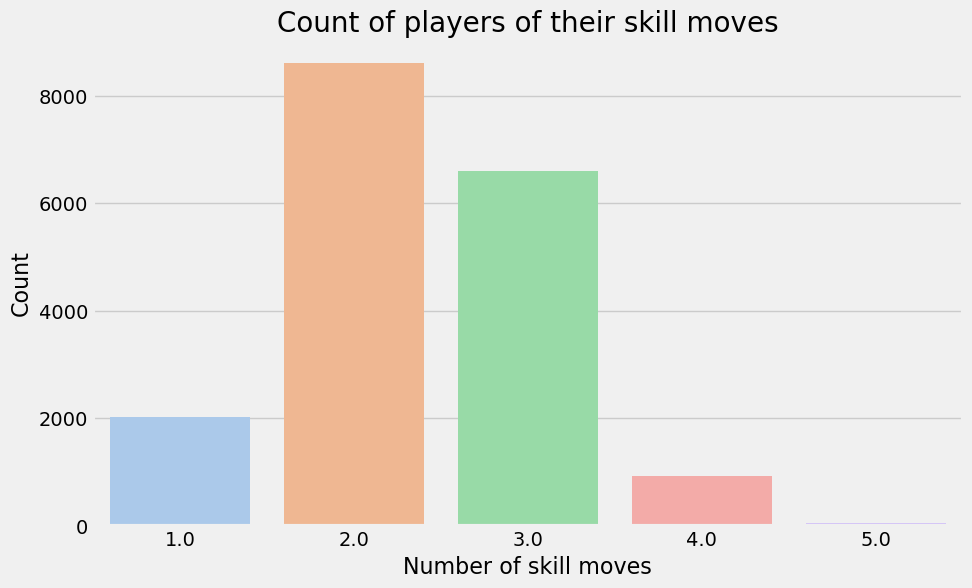

In [50]:
#skill moves of player
plt.figure(figsize= (10,6))
ax = sns.countplot(x= 'Skill Moves', data = data, palette= "pastel")
ax.set_xlabel(xlabel = 'Number of skill moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_title(label='Count of players of their skill moves', fontsize=20)
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_39536\2227370432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Work Rate', data= data, palette='hls')


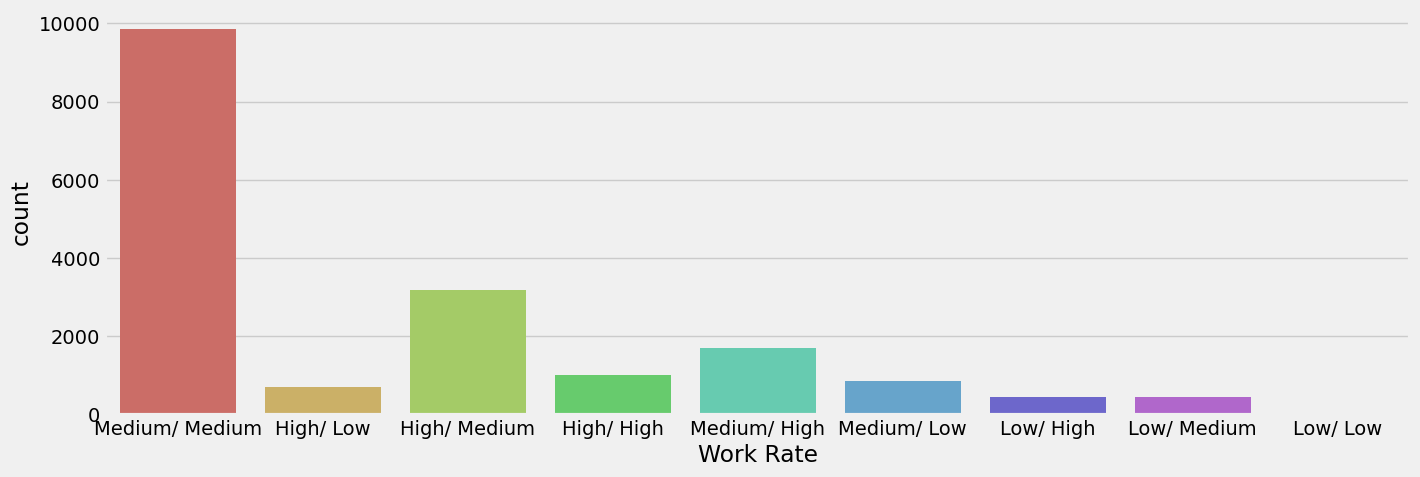

In [51]:
# To show different work rate of the players participating in the FIFA 2019
plt.figure(figsize= (15,5))
plt.style.use("fivethirtyeight")

sns.countplot(x = 'Work Rate', data= data, palette='hls')
ax.set_xlabel(xlabel = 'different work rate associated with players', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of players', fontsize = 16)
ax.set_title(label='different work rate of the players participating in the FIFA 2019', fontsize=20)
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_39536\2222375731.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-paper")
C:\Users\prana\AppData\Local\Temp\ipykernel_39536\2222375731.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = 58, kde=False, color = 'y')
C:\Users\prana\AppData\Local\Temp\ipykernel_39536\2222375731.py:15: UserWarning: 

`distplot` is a deprecated functi

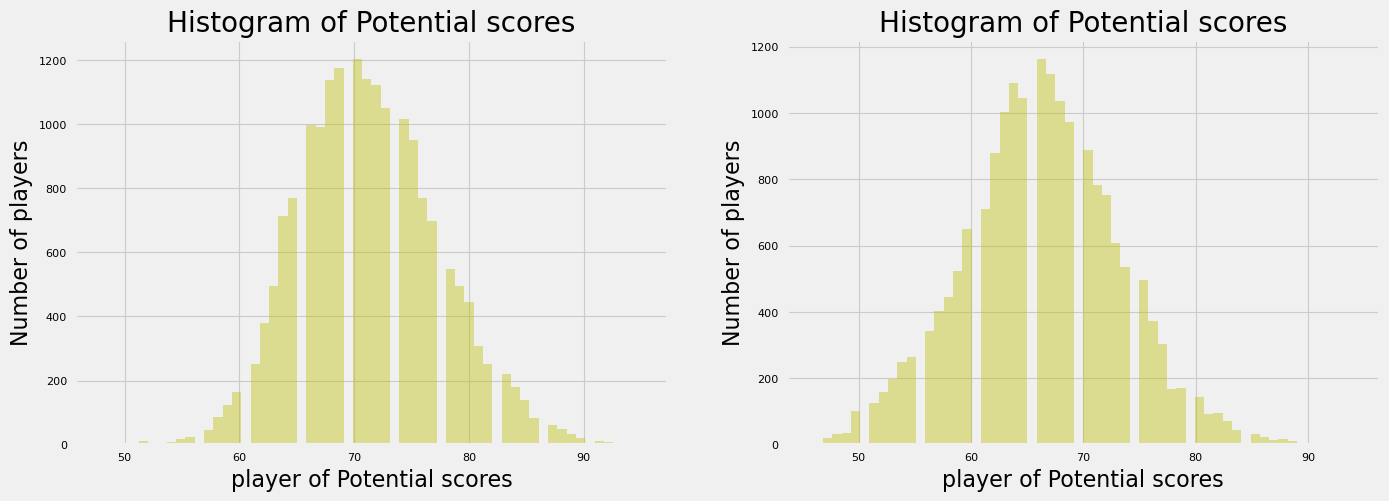

In [52]:
# show the potential scores of players participating in the FIFA 2019
plt.style.use("seaborn-paper")
plt.figure(figsize= (15,5))


plt.subplot(1,2,1)
x = data.Potential
ax = sns.distplot(x, bins = 58, kde=False, color = 'y')
ax.set_xlabel(xlabel = 'player of Potential scores', fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label='Histogram of Potential scores', fontsize=20)

plt.subplot(1,2,2)
x = data.Overall
ax = sns.distplot(x, bins = 58, kde=False, color = 'y')
ax.set_xlabel(xlabel = 'player of Potential scores', fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label='Histogram of Potential scores', fontsize=20)
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_39536\3968666011.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark-palette")


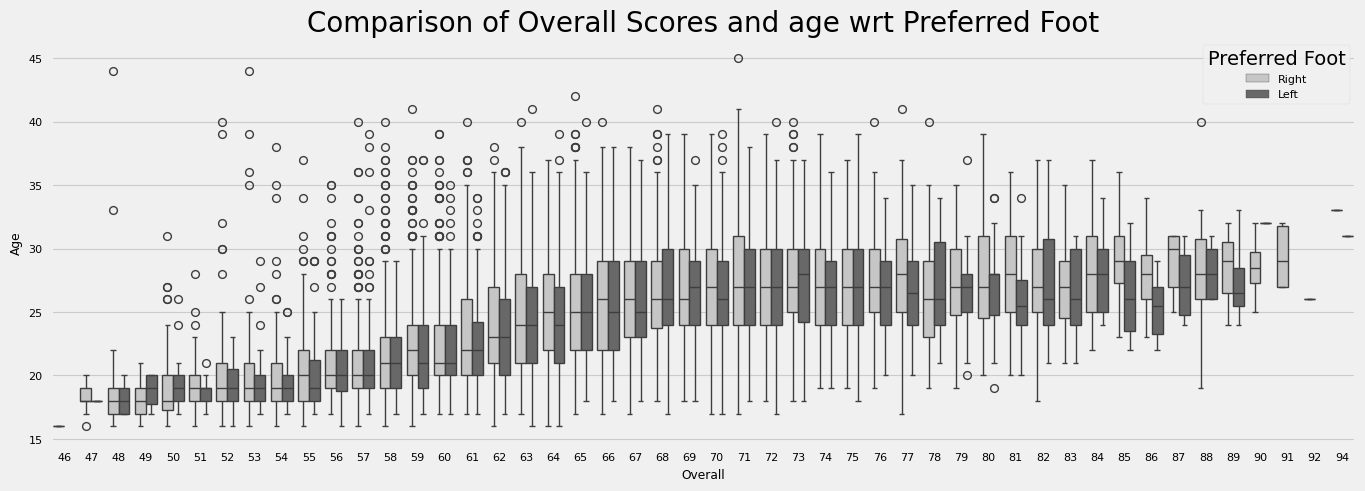

In [57]:
#violin Plot
plt.rcParams['figure.figsize']= (15,5)
plt.style.use("seaborn-dark-palette")

sns.boxplot(x = 'Overall', y='Age',data=data, hue = data['Preferred Foot'], palette ='Greys')
plt.title('Comparison of Overall Scores and age wrt Preferred Foot', fontsize=20)
plt.show()

# Countries with Most Players

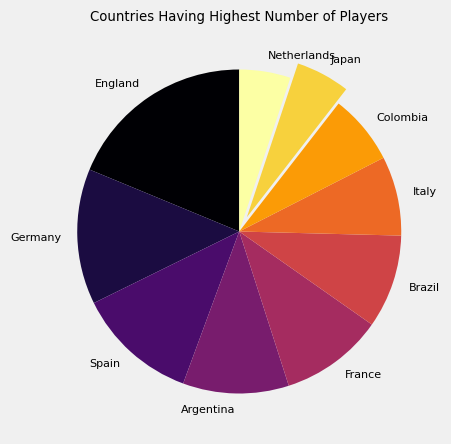

In [60]:
# Picking up the countries with highest number of players to compare their overall scores

data['Nationality'].value_counts().head(10).plot(kind = 'pie', cmap = 'inferno', startangle = 90, 
                                                 explode =[0,0,0,0,0,0,0,0,0.1,0])

plt.title('Countries Having Highest Number of Players')
plt.axis('off')
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_39536\3881769424.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x = data_countries['Nationality'], y =data_countries['Weight'], palette="Reds" )


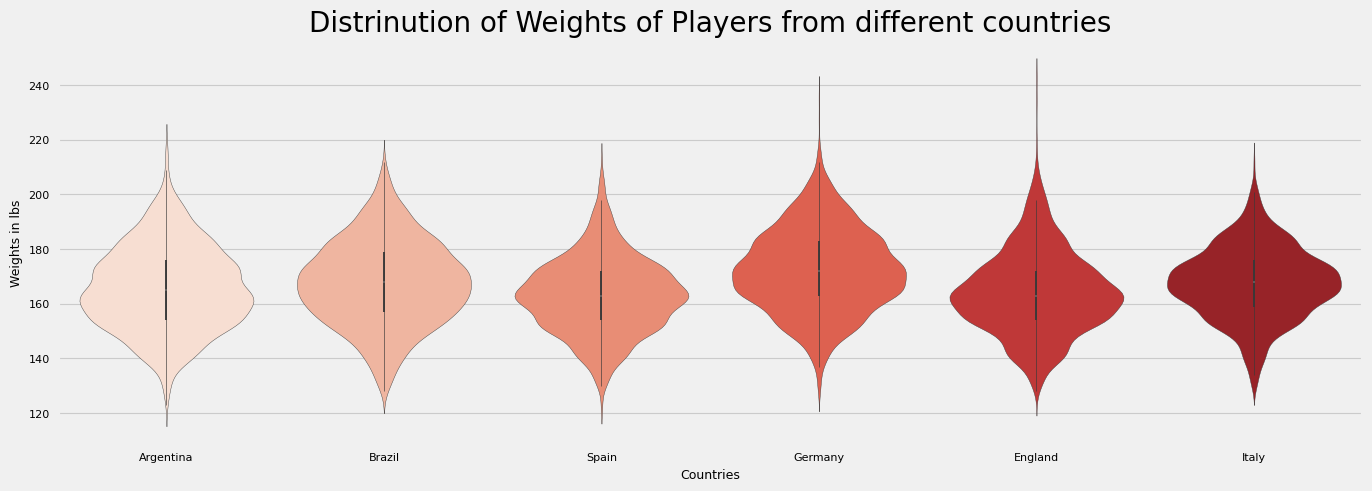

In [61]:
# Every nations Players and their Weights

some_countries = ('England', 'Germany', 'Spain', 'Argentina','france', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Weight']]

plt.rcParams['figure.figsize']= (15,5)
ax = sns.violinplot(x = data_countries['Nationality'], y =data_countries['Weight'], palette="Reds" )
ax.set_xlabel(xlabel="Countries", fontsize = 9)
ax.set_ylabel(ylabel="Weights in lbs", fontsize = 9)
ax.set_title(label="Distrinution of Weights of Players from different countries", fontsize = 20)
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_39536\674259546.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = data_countries['Nationality'], y =data_countries['Overall'], palette="spring" )


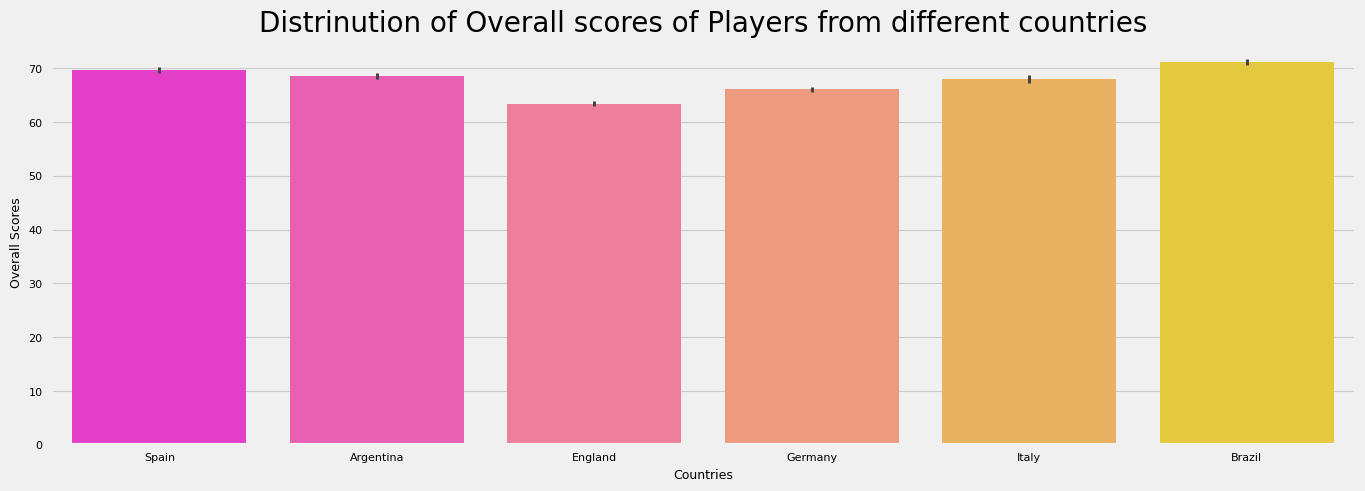

In [62]:
# Every nations Players and their Overall scores
some_countries = ('England', 'Germany', 'Spain', 'Argentina','france', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize']= (15,5)
ax = sns.barplot(x = data_countries['Nationality'], y =data_countries['Overall'], palette="spring" )
ax.set_xlabel(xlabel="Countries", fontsize = 9)
ax.set_ylabel(ylabel="Overall Scores", fontsize = 9)
ax.set_title(label="Distrinution of Overall scores of Players from different countries", fontsize = 20)
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_39536\1158259383.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = data_countries['Nationality'], y =data_countries['Wage'], palette="Purples" )


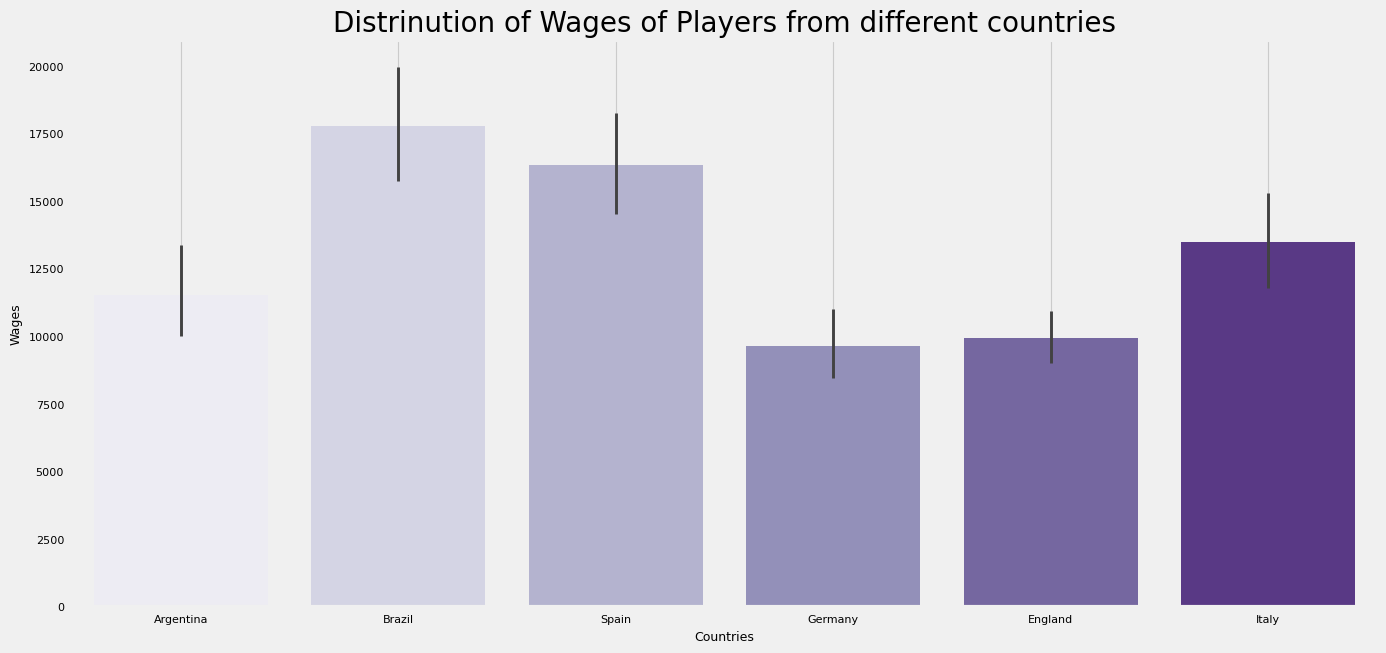

In [63]:
# Every nations Players and their Wages
some_countries = ('England', 'Germany', 'Spain', 'Argentina','france', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize']= (15,7)
ax = sns.barplot(x = data_countries['Nationality'], y =data_countries['Wage'], palette="Purples" )
ax.set_xlabel(xlabel="Countries", fontsize = 9)
ax.set_ylabel(ylabel="Wages", fontsize = 9)
ax.set_title(label="Distrinution of Wages of Players from different countries", fontsize = 20)
plt.grid()
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_39536\1896650254.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxenplot(x = data_countries['Nationality'], y =data_countries['International Reputation'], palette="Purples" )


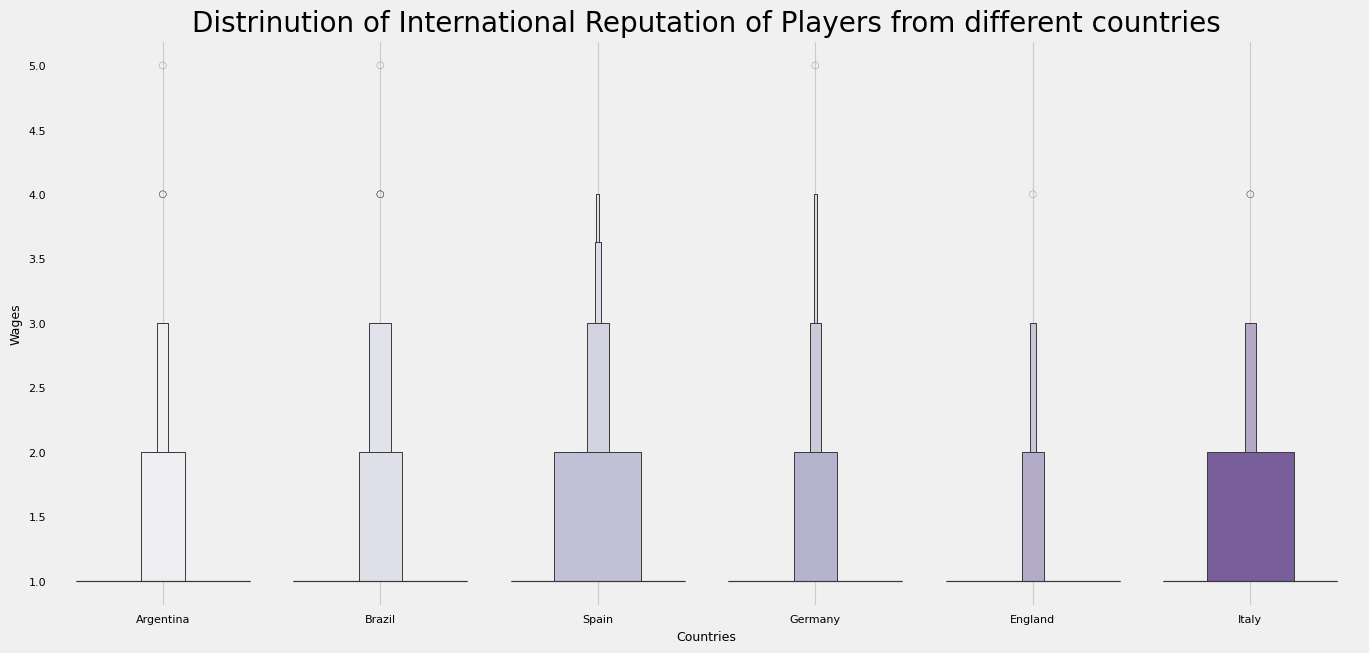

In [64]:
# Every nations Players and their International Reputation
some_countries = ('England', 'Germany', 'Spain', 'Argentina','france', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]

plt.rcParams['figure.figsize']= (15,7)
ax = sns.boxenplot(x = data_countries['Nationality'], y =data_countries['International Reputation'], palette="Purples" )
ax.set_xlabel(xlabel="Countries", fontsize = 9)
ax.set_ylabel(ylabel="Wages", fontsize = 9)
ax.set_title(label="Distrinution of International Reputation of Players from different countries", fontsize = 20)
plt.grid()
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_39536\3258927317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = data_clubs['Club'], y =data_countries['Overall'], palette="inferno" )


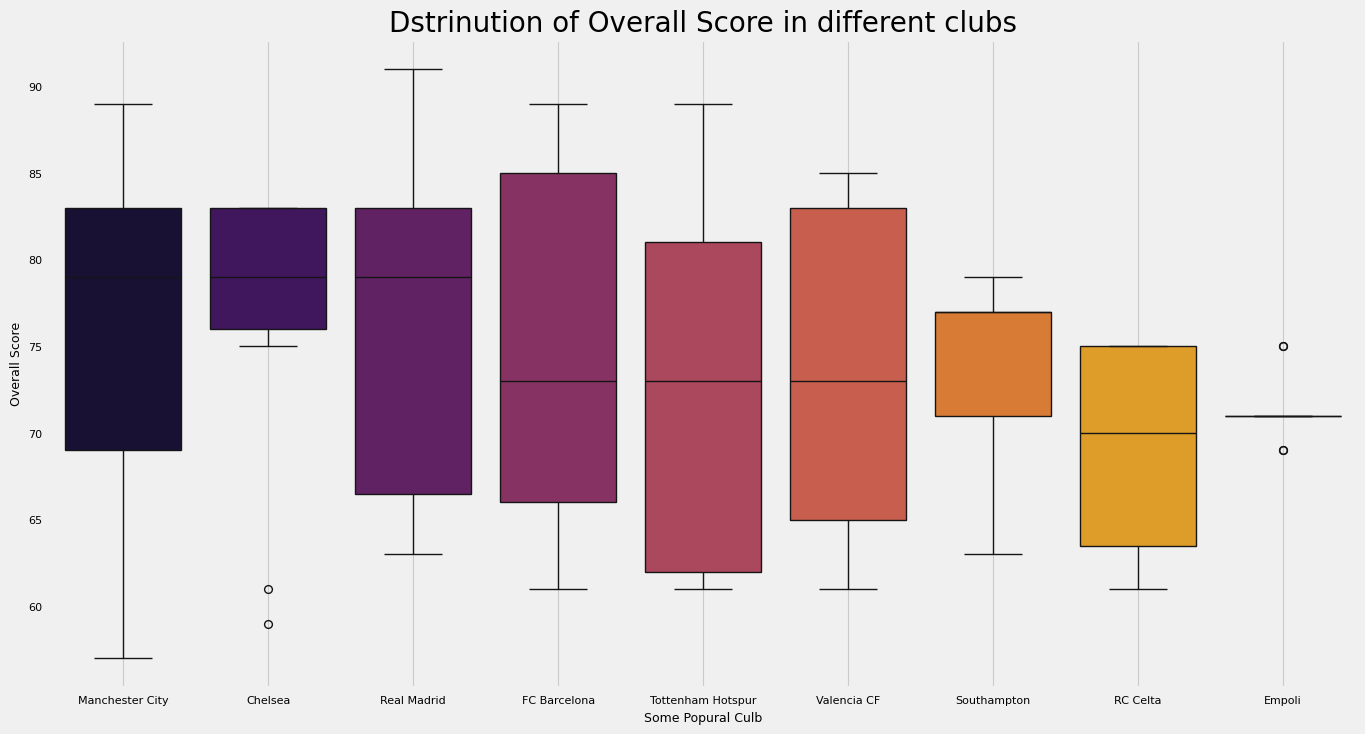

In [65]:
some_clubs = ('CD Leganes', 'Southampton', 'RC Celta', 'Empoli', "Fortuna Dusseldorf",'Manchester City',"Tottenham Hotspur", "FC Barcelona", "Valencia CF", "Chelsea", "Real Madrid")

data_clubs = data.loc[data['Club'].isin(some_clubs) & data["Overall"]]

plt.rcParams['figure.figsize']= (15,8)
ax = sns.boxplot(x = data_clubs['Club'], y =data_countries['Overall'], palette="inferno" )
ax.set_xlabel(xlabel="Some Popural Culb", fontsize = 9)
ax.set_ylabel(ylabel="Overall Score", fontsize = 9)
ax.set_title(label='Dstrinution of Overall Score in different clubs', fontsize=20)
plt.grid()
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_39536\1534485362.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = 'Club', y ='Age', data = data_club, palette="magma" )


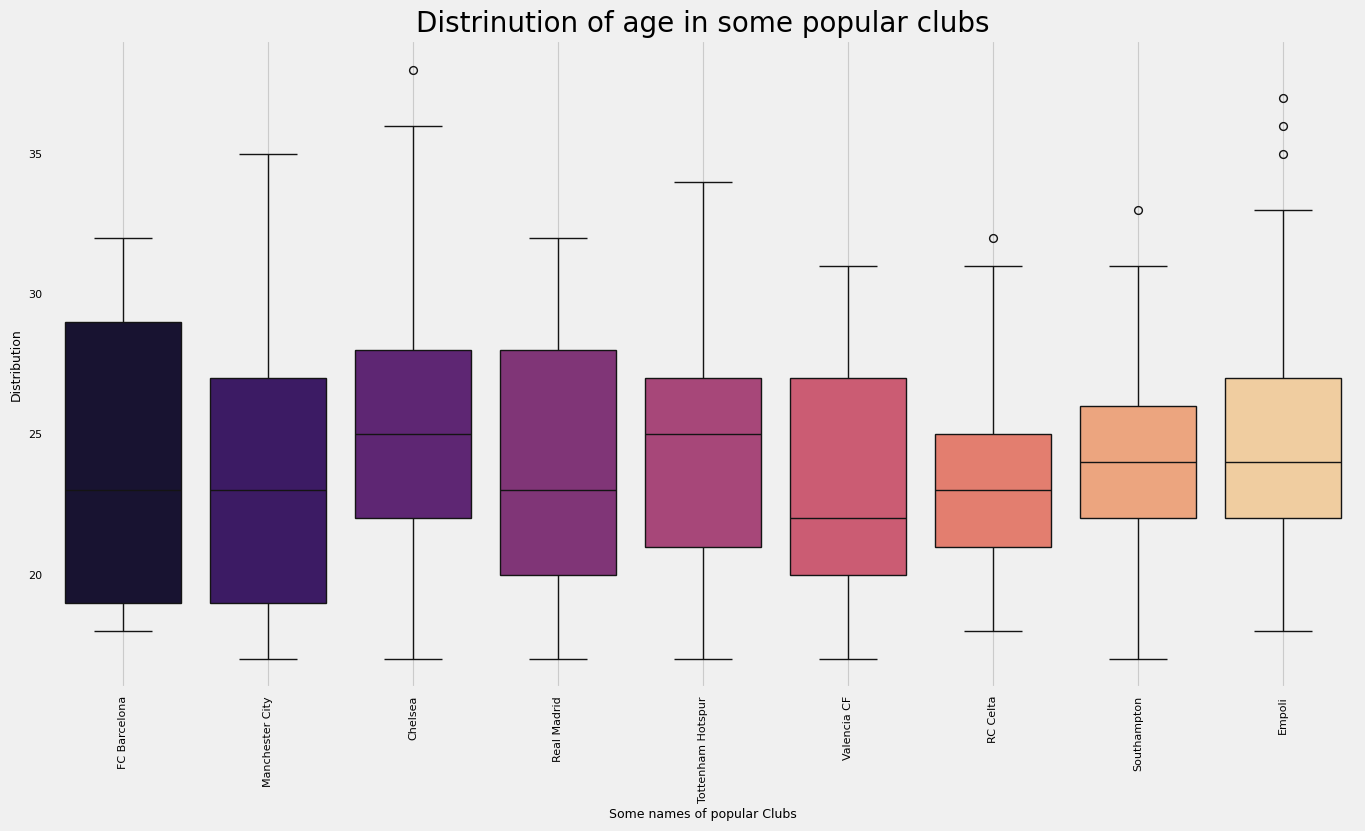

In [66]:
# 'Dstrinution of ages in some popular clubs
some_clubs = ('CD Leganes', 'Southampton', 'RC Celta', 'Empoli', "Fortuna Dusseldorf",'Manchester City',"Tottenham Hotspur", "FC Barcelona", "Valencia CF", "Chelsea", "Real Madrid")

data_club = data.loc[data['Club'].isin(some_clubs) & data["Wage"]]

plt.rcParams['figure.figsize']= (15,8)
ax = sns.boxplot(x = 'Club', y ='Age', data = data_club, palette="magma" )
ax.set_xlabel(xlabel="Some names of popular Clubs", fontsize = 9)
ax.set_ylabel(ylabel="Distribution", fontsize = 9)
ax.set_title(label='Distrinution of age in some popular clubs', fontsize=20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_39536\1921177402.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x ='Club', y ='Wage', data = data_club, palette="magma" )


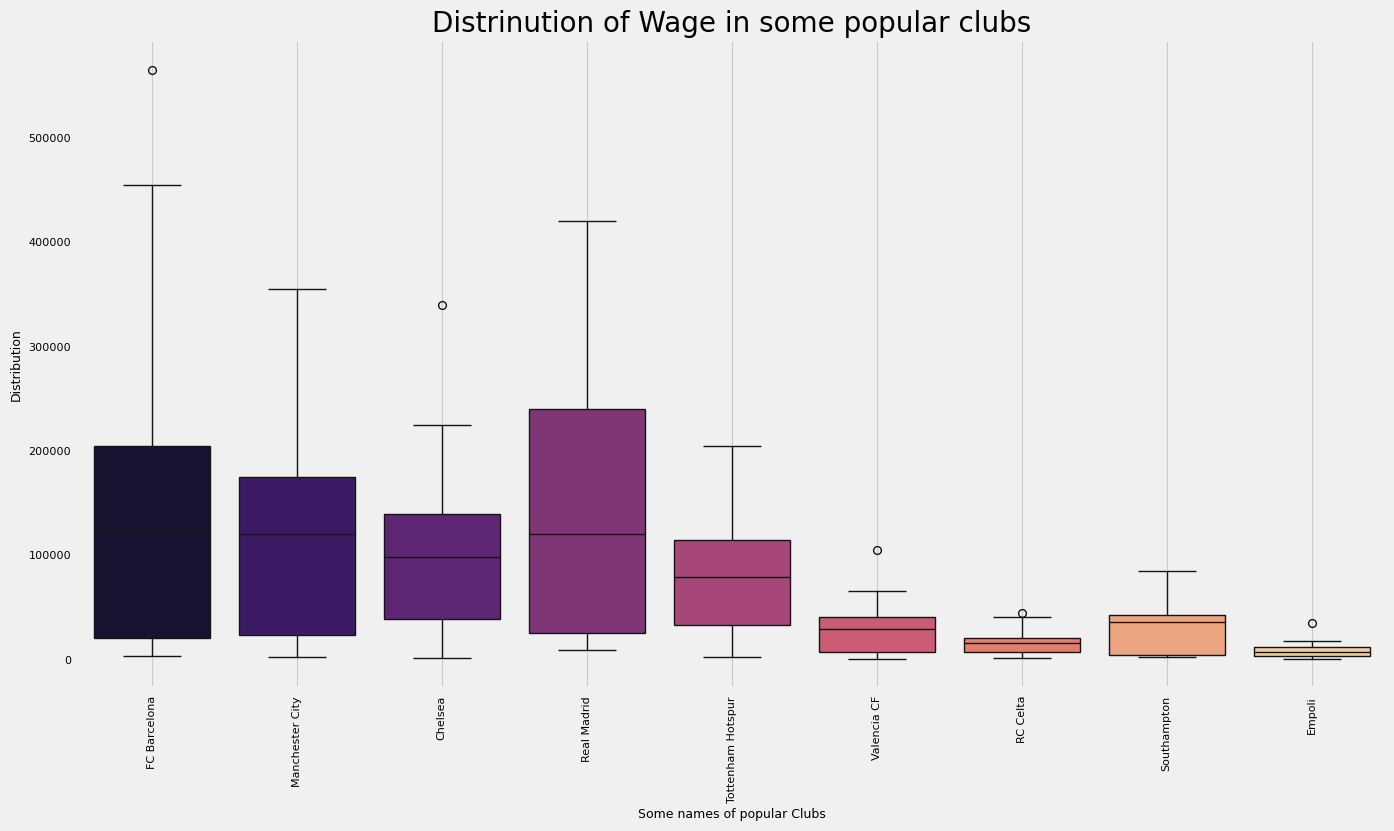

In [67]:
# 'Dstrinution of Wages in some popular clubs
some_clubs = ('CD Leganes', 'Southampton', 'RC Celta', 'Empoli', "Fortuna Dusseldorf",'Manchester City',"Tottenham Hotspur", "FC Barcelona", "Valencia CF", "Chelsea", "Real Madrid")

data_club = data.loc[data['Club'].isin(some_clubs) & data["Wage"]]

plt.rcParams['figure.figsize']= (15,8)
ax = sns.boxplot(x ='Club', y ='Wage', data = data_club, palette="magma" )
ax.set_xlabel(xlabel="Some names of popular Clubs", fontsize = 9)
ax.set_ylabel(ylabel="Distribution", fontsize = 9)
ax.set_title(label='Distrinution of Wage in some popular clubs', fontsize=20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_39536\2054041708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x ='Club', y ='International Reputation', data = data_club, palette="magma" )


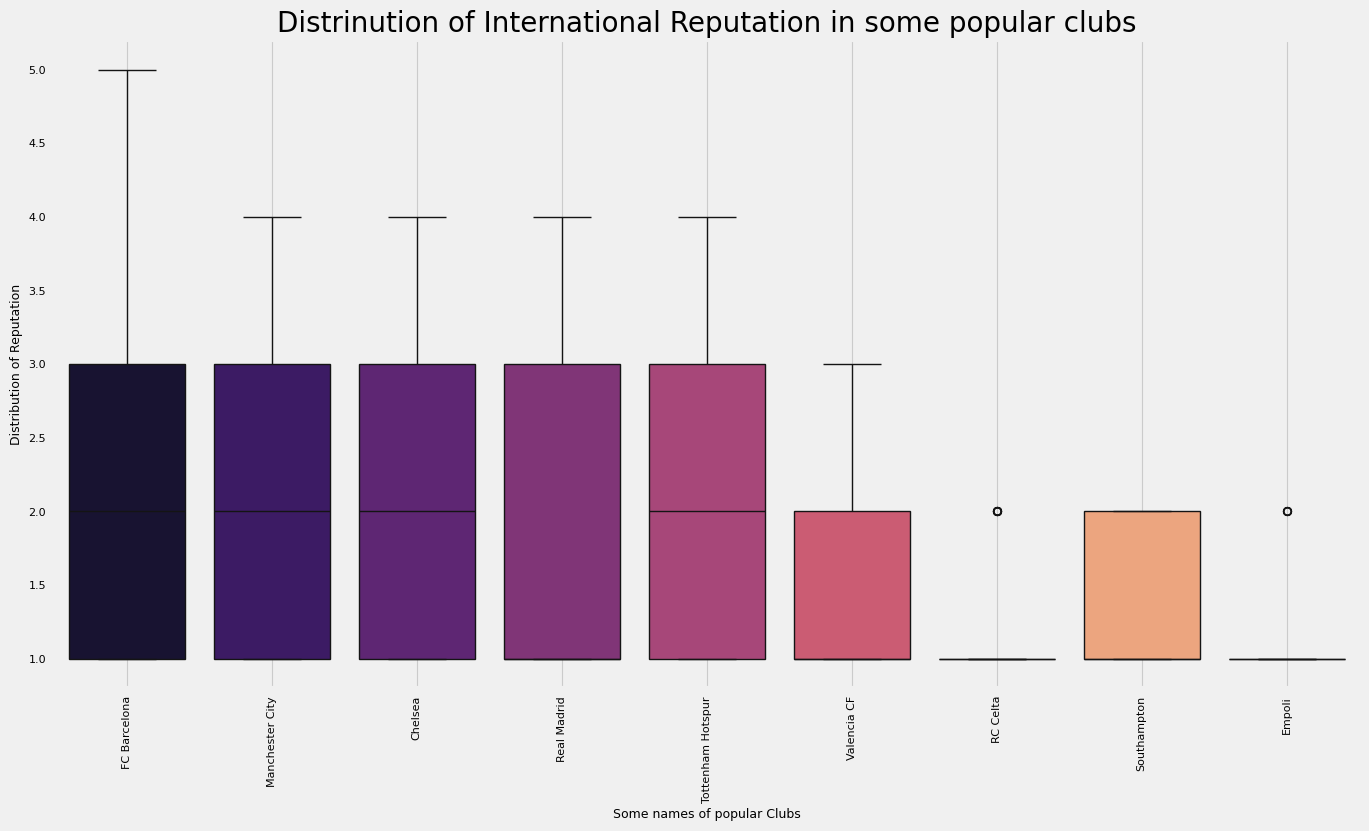

In [68]:
# 'Dstrinution of International Reputation in some popular clubs
some_clubs = ('CD Leganes', 'Southampton', 'RC Celta', 'Empoli', "Fortuna Dusseldorf",'Manchester City',"Tottenham Hotspur", "FC Barcelona", "Valencia CF", "Chelsea", "Real Madrid")

data_club = data.loc[data['Club'].isin(some_clubs) & data["International Reputation"]]

plt.rcParams['figure.figsize']= (15,8)
ax = sns.boxplot(x ='Club', y ='International Reputation', data = data_club, palette="magma" )
ax.set_xlabel(xlabel="Some names of popular Clubs", fontsize = 9)
ax.set_ylabel(ylabel="Distribution of Reputation", fontsize = 9)
ax.set_title(label='Distrinution of International Reputation in some popular clubs', fontsize=20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

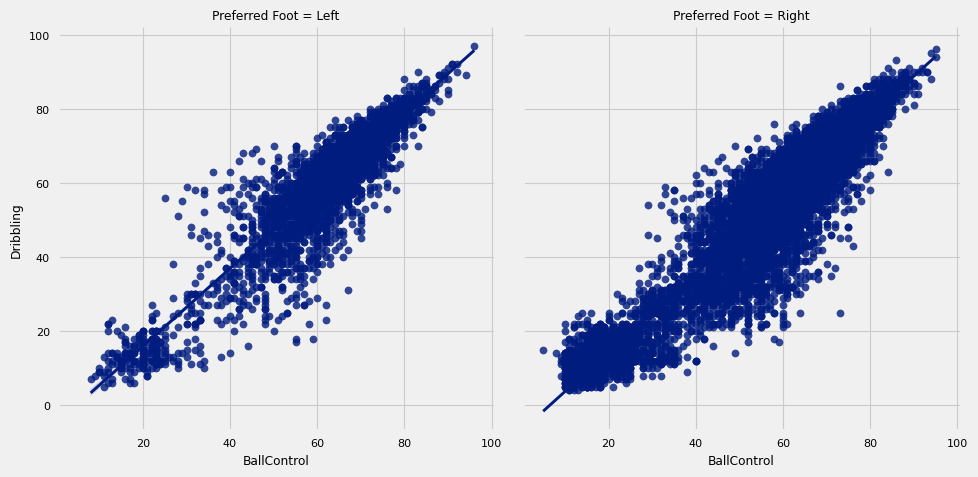

In [69]:
# Ball control vs dribbing

sns.lmplot(x = 'BallControl', y= 'Dribbling', data = data, col='Preferred Foot')
plt.show()

# Query Analysis

In [70]:
# Best Player per each position with their age, club, and nationality based on their overall scores

data.iloc[data.groupby(data["Position"])["Overall"].idxmax()][["Position",'Name','Age','Club','Nationality',
                                                               'Overall']].sort_values(by='Overall', ascending = False).style.background_gradient(cmap='pink')

,Position,Name,Age,Club,Nationality,Overall
1,ST,Cristiano Ronaldo,33,Juventus,Portugal,94
0,RF,L. Messi,31,FC Barcelona,Argentina,94
2,LW,Neymar Jr,26,Paris Saint-Germain,Brazil,92
5,LF,E. Hazard,27,Chelsea,Belgium,91
7,RS,L. Suárez,31,FC Barcelona,Uruguay,91
4,RCM,K. De Bruyne,27,Manchester City,Belgium,91
3,GK,De Gea,27,Manchester United,Spain,91
8,RCB,Sergio Ramos,32,Real Madrid,Spain,91
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
11,LCM,T. Kroos,28,Real Madrid,Germany,90


In [71]:
# Lets analyze the skills of Players

@interact
def skill(skills = ["Defending","General","Mental","Passing","Mobility","Power", 'Rating',"Shooting"], score=75):
    return data[data[skills] > score][['Name',
                                       'Nationality', 'Club', "Overall", skills]].sort_values(by= skills, ascending = False).head(20).style.background_gradient(cmap='Blues')

interactive(children=(Dropdown(description='skills', options=('Defending', 'General', 'Mental', 'Passing', 'Mo…

In [72]:
# Lets make a function to see the list of top 15 Players fron each country

@interact
def country(country = list(data['Nationality'].value_counts().index)):
    return data[data["Nationality"] == country][["Name", "Position", "Overall","Club","Potential"]].sort_values(by ='Overall',
                                                ascending = False).head(15).style.background_gradient(cmap='magma')


interactive(children=(Dropdown(description='country', options=('England', 'Germany', 'Spain', 'Argentina', 'Fr…

In [73]:
# Youngest Player from FIFA 2019

youngest = data[data["Age"] == 16][['Name',"Age","Club","Nationality","Overall"]]
youngest.sort_values(by="Overall", ascending = False).head(15).style.background_gradient(cmap='inferno')

,Name,Age,Club,Nationality,Overall
11457,W. Geubbels,16,AS Monaco,France,64
11732,A. Taoui,16,Toulouse Football Club,France,64
12496,Pelayo Morilla,16,Real Sporting de Gijón,Spain,63
12828,Guerrero,16,CF Rayo Majadahonda,Spain,63
13293,H. Massengo,16,AS Monaco,France,62
13567,Y. Verschaeren,16,RSC Anderlecht,Belgium,62
15363,Y. Roemer,16,VVV-Venlo,Netherlands,59
15746,Y. Begraoui,16,AJ Auxerre,France,59
15793,J. Lahne,16,IF Brommapojkarna,Sweden,59
16254,S. Steijn,16,VVV-Venlo,Netherlands,58


In [74]:
# Eldest Player from FIFA 2019

data.sort_values("Age", ascending = False)[['Name',"Age","Club","Nationality","Overall"]].head(15).style.background_gradient(cmap='Wistia')

,Name,Age,Club,Nationality,Overall
4741,O. Pérez,45,Pachuca,Mexico,71
18183,K. Pilkington,44,Cambridge United,England,48
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago,53
10545,S. Narazaki,42,Nagoya Grampus,Japan,65
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina,68
1120,J. Villar,41,Club,Paraguay,77
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia,63
15426,M. Tyler,41,Peterborough United,England,59
4228,B. Nivet,41,ESTAC Troyes,France,71
10356,F. Kippe,40,Lillestrøm SK,Norway,65


In [75]:
data.sort_values("Age", ascending = True)[['Name',"Age","Club","Nationality","Overall"]].head(15).style.background_gradient(cmap='Wistia')

,Name,Age,Club,Nationality,Overall
18206,G. Nugent,16,Tranmere Rovers,England,46
17743,J. Olstad,16,Sarpsborg 08 FF,Norway,52
13293,H. Massengo,16,AS Monaco,France,62
16081,J. Italiano,16,Perth Glory,Australia,58
18166,N. Ayéva,16,Örebro SK,Sweden,48
17712,K. Broda,16,Wisła Kraków,Poland,53
17354,L. D'Arrigo,16,Adelaide United,Australia,54
13567,Y. Verschaeren,16,RSC Anderlecht,Belgium,62
16927,B. Nygren,16,IFK Göteborg,Sweden,56
18018,B. O'Gorman,16,Bray Wanderers,Republic of Ireland,50


In [76]:
# The longest membership in the club

now = datetime.datetime.now()
data["Join_year"] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(" ")[1])
data["Year_of_member"] = (data.Join_year.dropna().map(lambda x : now.year - int(x))).astype("int")

membership = data[["Name", "Club", "Year_of_member"]].sort_values(by="Year_of_member", ascending = False).head(10)
membership.set_index("Name" ,inplace = True)
membership.style.background_gradient(cmap="Reds")

,Club,Year_of_member
Name,,
O. Pérez,Pachuca,33
M. Al Shalhoub,Al Hilal,26
H. Sogahata,Kashima Antlers,26
M. Ogasawara,Kashima Antlers,26
S. Narazaki,Nagoya Grampus,25
M. Wölfli,BSC Young Boys,24
K. Kitamoto,Vissel Kobe,24
C. Källqvist,BK Häcken,23
Y. Endo,Gamba Osaka,23


In [77]:
import ipywidgets as widgets
from ipywidgets import interact
@interact
def check(column = "Year_of_member", club = ["FC Barcelona", "Real Madrid", "Chelsea"] , membership = 4 ):
    return data[(data[column] > membership ) & (data["Club"] == club)][[ "Name", "Club", "Year_of_member"]].sort_values(by = "Year_of_member", 
                                                            ascending = False).style.background_gradient(cmap="magma")

interactive(children=(Text(value='Year_of_member', description='column'), Dropdown(description='club', options…

In [81]:
# Top 10 Right footed players
data[data["Preferred Foot"] == "Right"][["Name", "Age", "Club", "Nationality", "Overall"]].sort_values(by = "Overall", 
                                                            ascending = False).head(15).style.background_gradient(cmap="copper")

,Name,Age,Club,Nationality,Overall
1,Cristiano Ronaldo,33,Juventus,Portugal,94
2,Neymar Jr,26,Paris Saint-Germain,Brazil,92
3,De Gea,27,Manchester United,Spain,91
4,K. De Bruyne,27,Manchester City,Belgium,91
5,E. Hazard,27,Chelsea,Belgium,91
6,L. Modrić,32,Real Madrid,Croatia,91
7,L. Suárez,31,FC Barcelona,Uruguay,91
8,Sergio Ramos,32,Real Madrid,Spain,91
9,J. Oblak,25,Atlético Madrid,Slovenia,90
10,R. Lewandowski,29,FC Bayern München,Poland,90


In [82]:
# Top 10 Right footed players
data[data["Preferred Foot"] == "Left"][["Name", "Age", "Club", "Nationality", "Overall"]].sort_values(by = "Overall", 
                                                            ascending = False).head(15).style.background_gradient(cmap="copper")

,Name,Age,Club,Nationality,Overall
0,L. Messi,31,FC Barcelona,Argentina,94
13,David Silva,32,Manchester City,Spain,90
15,P. Dybala,24,Juventus,Argentina,89
17,A. Griezmann,27,Atlético Madrid,France,89
19,T. Courtois,26,Real Madrid,Belgium,89
24,G. Chiellini,33,Juventus,Italy,89
35,Marcelo,30,Real Madrid,Brazil,88
37,H. Lloris,31,Tottenham Hotspur,France,88
36,G. Bale,28,Real Madrid,Wales,88
28,J. Rodríguez,26,FC Bayern München,Colombia,88
